# Comprehensive Evaluation System Demo

This notebook demonstrates the performance evaluation of the Nutrition Agent using the newly implemented comprehensive evaluation metrics.

## Evaluation Metrics
1. **Nutrition Score** (1.0): PFC ratio and calorie accuracy
2. **Constraint Satisfaction** (Mandatory): Allergen and dietary restriction compliance
3. **Inventory Utilization** (Mandatory): Efficient use of available ingredients
4. **Quality Scores** (Extensible): Diversity, feasibility, and nutritional balance

In [ ]:
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

import pandas as pd
from rich.console import Console

from agents.base_agent import AgentConfig, ModelProvider
from agents.nutrition_planner import (
    DietaryConstraints,
    Inventory,
    NutritionPlannerAgent,
)
from evaluators.reward_functions.nutrition import NutritionEvaluator

console = Console()

# Agent call display control
SHOW_AGENT_CALLS = True  # Set to False to hide Agent call details


class QuietConsole:
    """Class to control output during agent calls"""

    def __init__(self, show_calls=True):
        self.show_calls = show_calls
        self._original_print = print

    def __enter__(self):
        if not self.show_calls:
            # Disable print
            import builtins

            builtins.print = lambda *args, **kwargs: None
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        if not self.show_calls:
            # Restore print
            import builtins

            builtins.print = self._original_print


print("📊 Comprehensive evaluation system initialized")
print(f"Agent call display: {'ON' if SHOW_AGENT_CALLS else 'OFF'}")

📊 Comprehensive evaluation system initialized
Agent call display: ON


## 1. Sample Data Preparation

In [2]:
# Sample inventory data
sample_inventory = Inventory(
    items=[
        {"name": "chicken breast", "amount_g": 500, "unit": "g"},
        {"name": "rice", "amount_g": 1000, "unit": "g"},
        {"name": "broccoli", "amount_g": 300, "unit": "g"},
        {"name": "olive oil", "amount_g": 250, "unit": "ml"},
        {"name": "onion", "amount_g": 200, "unit": "g"},
        {"name": "garlic", "amount_g": 50, "unit": "g"},
        {"name": "soy sauce", "amount_g": 200, "unit": "ml"},
    ]
)

# Sample dietary constraints
sample_constraints = DietaryConstraints(
    daily_calories=2000,
    pfc_ratio=(30, 25, 45),  # Protein 30%, Fat 25%, Carbs 45%
    allergens=[],
    dietary_restrictions=[],
)

# Agent configuration
config = AgentConfig(
    model_provider=ModelProvider.OPENAI,
    model_name="gpt-4.1-mini",
    temperature=0.7,
)

print("✅ Sample data preparation complete")
print(f"Inventory items: {len(sample_inventory.items)}")
print(f"Target calories: {sample_constraints.daily_calories} kcal")
print(f"PFC ratio: {sample_constraints.pfc_ratio}")

✅ Sample data preparation complete
Inventory items: 7
Target calories: 2000 kcal
PFC ratio: (30, 25, 45)


## 2. Meal Plan Generation

In [3]:
# Create agent and generate meal plans
agent = NutritionPlannerAgent(config)

print("🤖 Generating meal plans...")

# Toggle control for Agent call results display
with QuietConsole(show_calls=SHOW_AGENT_CALLS):
    meal_plans = await agent.generate_meal_plan(
        inventory=sample_inventory, constraints=sample_constraints, days=3
    )

print(f"✅ Generated meal plans for {len(meal_plans)} days")

# Display generated meal plans (always shown)
agent.display_meal_plans(meal_plans)

🤖 Generating meal plans...


Using base agent to gather nutrition info and create meal plan...

Iteration 1/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "chicken breast"
})

• search_food_nutrition({
  "food_name": "rice"
})

• search_food_nutrition({
  "food_name": "broccoli"
})

• search_food_nutrition({
  "food_name": "olive oil"
})

• search_food_nutrition({
  "food_name": "onion"
})

• search_food_nutrition({
  "food_name": "garlic"
})

• search_food_nutrition({
  "food_name": "soy sauce"
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_AH0 │ ✓ Success │ {'foods': [{'name': 'Chicken Breast', 'brand': None, 'nutrition_per_100g': {'calories':  │
│          │           │ 195.0, 'prot...                                                                          │
│ call_NuU │ ✓ Success │ {'foods': [{'name': 'White Rice', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 129.0, 'protein_...                                                                      │
│ call_CbD │ ✓ Success │ {'foods': [{'name': 'Broccoli', 'brand': None, 'nutrition_per_100g': {'calories': 34.0,  │
│          │           │ 'protein_g':...                                                                          │
│ call_tn2 │ ✓ Success │ {'foods': [{'name': 'Olive Oil', 'brand': None, 'nutrition_per_100g': {'calories':       │
│          │           │ 884.0, 'protein_g...                                                                     │
│ call_Yso │ ✓ Success │ {'foods': [{'name': 'Onions', 'brand': None, 'nutrition_per_100g': {'calories': 42.0,    │
│          │           │ 'protein_g': 0...                                                                        │
│ call_jZp │ ✓ Success │ {'foods': [{'name': 'Garlic', 'brand': None, 'nutrition_per_100g': {'calories': 149.0,   │
│          │           │ 'protein_g': ...                                                                         │
│ call_azx │ ✓ Success │ {'foods': [{'name': 'Soy Sauce', 'brand': None, 'nutrition_per_100g': {'calories': 53.0, │
│          │           │ 'protein_g'...                                                                           │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 2/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "rice",
    "broccoli",
    "olive oil",
    "onion",
    "garlic",
    "soy sauce"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_euV │ ✓ Success │ {'recipes': [{'name': 'Olive Oil Chicken', 'description': 'A very delicious and low carb │
│          │           │ way to enjo...                                                                           │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 3/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "egg"
})

• search_food_nutrition({
  "food_name": "milk"
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_W7m │ ✓ Success │ {'foods': [{'name': 'Egg', 'brand': None, 'nutrition_per_100g': {'calories': 147.0,      │
│          │           │ 'protein_g': 12....                                                                      │
│ call_a8g │ ✓ Success │ {'foods': [{'name': 'Whole Milk', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 60.0, 'protein_g...                                                                      │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 4/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• calculate_pfc_balance({
  "meals": [
    {
      "name": "Day 1 Breakfast - Scrambled Eggs with Olive Oil",
      "calories": 400,
      "protein_g": 24,
      "fat_g": 25,
      "carbs_g": 10
    },
    {
      "name": "Day 1 Lunch - Soy-Ginger Chicken Breast with Rice",
      "calories": 700,
      "protein_g": 50,
      "fat_g": 15,
      "carbs_g": 70
    },
    {
      "name": "Day 1 Dinner - Garlic Chicken & Broccoli Alfredo",
      "calories": 900,
      "protein_g": 60,
      "fat_g": 40,
      "carbs_g": 50
    }
  ],
  "target_calories": 2000,
  "target_pfc": [
    30,
    25,
    45
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_AW7 │ ✓ Success │ {'daily_totals': {'calories': 2000, 'protein_g': 134, 'fat_g': 80, 'carbs_g': 130,       │
│          │           │ 'pfc_ratio': (30....                                                                     │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 5/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• calculate_pfc_balance({
  "meals": [
    {
      "name": "Day 1 Breakfast - Boiled Eggs with Rice",
      "calories": 450,
      "protein_g": 30,
      "fat_g": 20,
      "carbs_g": 30
    },
    {
      "name": "Day 1 Lunch - Soy-Ginger Chicken Breast with Broccoli and Rice",
      "calories": 650,
      "protein_g": 50,
      "fat_g": 15,
      "carbs_g": 65
    },
    {
      "name": "Day 1 Dinner - Stir Fry Chicken with Broccoli and Soy Sauce",
      "calories": 900,
      "protein_g": 55,
      "fat_g": 15,
      "carbs_g": 100
    }
  ],
  "target_calories": 2000,
  "target_pfc": [
    30,
    25,
    45
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_JJX │ ✓ Success │ {'daily_totals': {'calories': 2000, 'protein_g': 135, 'fat_g': 50, 'carbs_g': 195,       │
│          │           │ 'pfc_ratio': (30....                                                                     │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 6/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "rice",
    "broccoli",
    "olive oil",
    "onion",
    "garlic",
    "soy sauce"
  ],
  "dietary_restrictions": []
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_HFK │ ✓ Success │ {'recipes': [{'name': 'Olive Oil Chicken', 'description': 'A very delicious and low carb │
│          │           │ way to enjo...                                                                           │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 7/10

╭─────────────────────────────────────────────── 🤖 Agent Response ───────────────────────────────────────────────╮
│ I have gathered nutritional data for the available ingredients, and searched for recipes that can be made with  │
│ the given ingredients. I also tested sample meal macro balances and found a close match to the target PFC       │
│ ratio.                                                                                                          │
│                                                                                                                 │
│ Now I will create a detailed 3-day meal plan using mostly available ingredients, aiming to meet daily targets   │
│ of 2000 kcal with 30% protein, 25% fat, and 45% carbohydrates. I will use combination of rice, chicken breast,  │
│ broccoli, olive oil, onion, garlic, and soy sauce with reasonable portions. Missing ingredients will be common  │
│ pantry items like salt, pepper, and some fresh herbs for flavor.                                                │
│                                                                                                                 │
│ ---                                                                                                             │
│                                                                                                                 │
│ {                                                                                                               │
│   "meal_plans": [                                                                                               │
│     {                                                                                                           │
│       "day": 1,                                                                                                 │
│       "breakfast": {                                                                                            │
│         "name": "Scrambled Eggs with Rice",                                                                     │
│         "ingredients": [                                                                                        │
│           "3 large eggs",                                                                                       │
│           "100g cooked rice",                                                                                   │
│           "1 tbsp olive oil",                                                                                   │
│           "Salt and pepper to taste"                                                                            │
│         ],                                                                                                      │
│         "calories": 450,                                                                                        │
│         "protein_g": 30,                                                                                        │
│         "fat_g": 20,                                                                                            │
│         "carbs_g": 30,                                                                                          │
│         "cooking_instructions": "Whisk eggs with salt and pepper. Heat olive oil in a pan over medium heat. Add │
│ eggs and scramble gently. Serve with cooked rice on the side."                                                  │
│       },                                                                                                        │
│       "lunch": {                                                                                                │
│         "name": "Soy-Ginger Chicken Breast with Broccoli and Rice",                                             │
│         "ingredients": [                                                                                        │
│           "150g chicken breast",                       

✅ Generated meal plans for 3 days


Day 1 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    450.0 │        30.0 │    20.0 │      30.0 │
│ Lunch        │    650.0 │        50.0 │    15.0 │      65.0 │
│ Dinner       │    900.0 │        55.0 │    15.0 │     100.0 │
│ Daily Total  │   2000.0 │       135.0 │    50.0 │     195.0 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 30.5% / 25.4% / 44.1%

Missing ingredients: eggs, salt, pepper

Day 2 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    430.0 │        32.0 │    21.0 │      28.0 │
│ Lunch        │    700.0 │        55.0 │    15.0 │      45.0 │
│ Dinner       │    870.0 │        55.0 │    14.0 │      90.0 │
│ Daily Total  │   2000.0 │       142.0 │    50.0 │     163.0 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 28.4% / 22.5% / 49.1%

Missing ingredients: eggs, salt, pepper

Day 3 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    480.0 │        28.0 │    18.0 │      40.0 │
│ Lunch        │    650.0 │        50.0 │    15.0 │      45.0 │
│ Dinner       │    870.0 │        60.0 │    15.0 │      90.0 │
│ Daily Total  │   2000.0 │       138.0 │    48.0 │     175.0 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 27.6% / 21.6% / 50.8%

Missing ingredients: eggs, salt, pepper

## 3. Comprehensive Evaluation

In [ ]:
# Create comprehensive evaluator (updated to current implementation)
evaluator = NutritionEvaluator()

print("📊 Running comprehensive evaluation...")

# Extract daily nutrition (simplified - in production would parse actual output)
daily_nutrition = {
    "total_calories": sum(plan.daily_nutrition["total_calories"] for plan in meal_plans)
    / len(meal_plans),
    "total_protein_g": sum(
        plan.daily_nutrition["total_protein_g"] for plan in meal_plans
    )
    / len(meal_plans),
    "total_fat_g": sum(plan.daily_nutrition["total_fat_g"] for plan in meal_plans)
    / len(meal_plans),
    "total_carbs_g": sum(plan.daily_nutrition["total_carbs_g"] for plan in meal_plans)
    / len(meal_plans),
}


print("\n=== 1. Nutrition Balance Evaluation ===")

# Calculate nutrition score
nutrition_score, nutrition_errors, nutrition_violations = (
    evaluator.calculate_nutrition_score(daily_nutrition, sample_constraints)
)


print(f"Nutrition Score: {nutrition_score:.3f}/1.0")
print(f"Nutrition Errors: {nutrition_errors}")
if nutrition_violations:
    print(f"Nutrition Violations: {nutrition_violations}")

# Check for critical failures
has_critical_failure, critical_failure_msgs = (
    evaluator.evaluator_manager.check_critical_failures(
        meal_plans, sample_constraints, sample_inventory
    )
)


print("\n=== 2. Critical Failure Check ===")
print(f"Has Critical Failure: {has_critical_failure}")
if critical_failure_msgs:
    print(f"Critical Failures: {critical_failure_msgs}")

# Calculate constraint satisfaction score
constraint_satisfaction_score, detailed_violations = (
    evaluator.calculate_constraint_satisfaction_score(
        meal_plans, sample_constraints, sample_inventory
    )
)


print("\n=== 3. Constraint Satisfaction Evaluation ===")
print(f"Constraint Satisfaction Score: {constraint_satisfaction_score:.3f}")
print(f"Detailed Violations: {detailed_violations}")

# Calculate inventory utilization score
inventory_utilization_score, inventory_details = (
    evaluator.calculate_inventory_utilization_score(
        meal_plans, sample_constraints, sample_inventory
    )
)


print("\n=== 4. Inventory Utilization Evaluation ===")
print(f"Inventory Utilization Score: {inventory_utilization_score:.3f}")
print(f"Inventory Details: {inventory_details}")

# Calculate quality scores
quality_scores = evaluator.calculate_quality_scores(
    meal_plans, sample_constraints, sample_inventory
)


print("\n=== 5. Quality Scores Evaluation ===")
print(f"Quality Scores: {quality_scores}")

# Calculate overall score
overall_score = evaluator.calculate_overall_score(
    nutrition_score,
    constraint_satisfaction_score,
    inventory_utilization_score,
    quality_scores,
    has_critical_failure,
)

print("\n=== Overall Evaluation Results ===")
print(f"Overall Score: {overall_score:.3f}/1.0")
print(f"Nutrition Score: {nutrition_score:.3f}")
print(f"Constraint Satisfaction: {constraint_satisfaction_score:.3f}")
print(f"Inventory Utilization: {inventory_utilization_score:.3f}")
if quality_scores.get("individual_scores"):
    avg_quality = sum(quality_scores["individual_scores"].values()) / len(
        quality_scores["individual_scores"]
    )
    print(f"Average Quality Score: {avg_quality:.3f}")

📊 Running comprehensive evaluation...

=== 1. Nutrition Balance Evaluation ===
Nutrition Score: 0.724/0.5
Nutrition Errors: {'calories': 0.0, 'protein': 7.777777777777771, 'fat': 11.2, 'carbs': 21.03703703703704}
Nutrition Violations: ['Fat off by 11.2%', 'Carbs off by 21.0%']

=== 2. Critical Failure Check ===
Has Critical Failure: False

=== 3. Constraint Satisfaction Evaluation ===
Constraint Satisfaction Score: 0.984
Detailed Violations: {'allergen_violations': [], 'dietary_restriction_violations': [], 'meal_distribution_violations': []}

=== 4. Inventory Utilization Evaluation ===
Inventory Utilization Score: 0.940
Inventory Details: {'inventory_utilization_rate': 1.0, 'missing_ingredients_quality': 1.0, 'ingredient_efficiency': 0.7, 'used_items_count': 7, 'available_items_count': 7, 'avg_ingredients_per_meal': 2.111111111111111, 'missing_ingredients': ['eggs', 'salt', 'pepper', 'eggs', 'salt', 'pepper', 'eggs', 'salt', 'pepper'], 'used_items': ['onion', 'rice', 'broccoli', 'soy s

## 4. Radar Chart Visualization

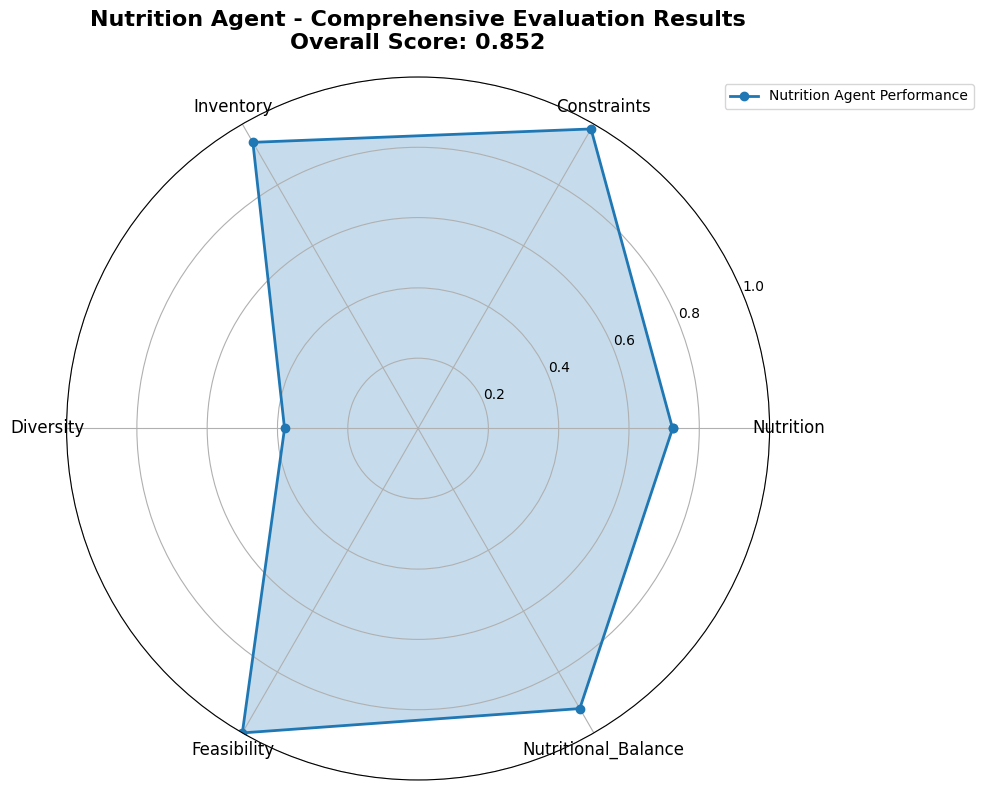


📊 Radar chart visualization complete - Overall Score: 0.852


In [5]:
from math import pi

import matplotlib.pyplot as plt

# Prepare data for radar chart
metrics = ["Nutrition", "Constraints", "Inventory"]
scores = [nutrition_score, constraint_satisfaction_score, inventory_utilization_score]

# Add quality scores if available
if quality_scores.get("individual_scores"):
    for metric_name, score in quality_scores["individual_scores"].items():
        metrics.append(metric_name.title())
        scores.append(score)

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": "polar"})

# Calculate angles
angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]  # Close the circle

# Close the values circle
scores += scores[:1]

# Plot
ax.plot(angles, scores, "o-", linewidth=2, label="Nutrition Agent Performance")
ax.fill(angles, scores, alpha=0.25)

# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)

# Set Y-axis
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"])
ax.grid(True)

# Title and legend
plt.title(
    f"Nutrition Agent - Comprehensive Evaluation Results\nOverall Score: {overall_score:.3f}",
    size=16,
    fontweight="bold",
    pad=20,
)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

print(f"\n📊 Radar chart visualization complete - Overall Score: {overall_score:.3f}")

## 6. Improvement Suggestions

In [6]:
def generate_improvement_suggestions(scores_dict, weights, threshold=0.6):
    """Generate improvement suggestions based on evaluation scores"""
    suggestions = []

    # Combine all scores
    all_scores = {
        "nutrition": nutrition_score,
        "constraint_satisfaction": constraint_satisfaction_score,
        "inventory_utilization": inventory_utilization_score,
    }

    # Add quality scores
    if quality_scores.get("individual_scores"):
        all_scores.update(quality_scores["individual_scores"])

    suggestion_map = {
        "nutrition": {
            "issue": "PFC balance or calorie accuracy is low",
            "suggestion": "Improve nutrition calculation tool accuracy, readjust target values",
        },
        "constraint_satisfaction": {
            "issue": "Dietary constraint compliance is incomplete",
            "suggestion": "Strengthen allergen checking, improve dietary restriction filters",
        },
        "inventory_utilization": {
            "issue": "Inventory ingredient utilization is insufficient",
            "suggestion": "Improve inventory-based recipe suggestion algorithm, optimize ingredient combinations",
        },
        "diversity": {
            "issue": "Meal diversity is lacking",
            "suggestion": "Increase cooking method variations, expand international cuisine database",
        },
        "feasibility": {
            "issue": "Cooking feasibility is low",
            "suggestion": "Simplify breakfast meals, consider cooking time constraints, provide step-by-step instructions",
        },
        "nutritional_balance": {
            "issue": "Nutritional balance consistency needs improvement",
            "suggestion": "Improve daily nutrition distribution, enhance macro balancing algorithms",
        },
    }

    for metric, score in all_scores.items():
        if score < threshold:
            weight = weights.get(metric, 0.1)
            impact = weight * (threshold - score)

            if metric in suggestion_map:
                suggestions.append(
                    {
                        "metric": metric.replace("_", " ").title(),
                        "score": score,
                        "impact": impact,
                        "issue": suggestion_map[metric]["issue"],
                        "suggestion": suggestion_map[metric]["suggestion"],
                    }
                )

    # Sort by impact
    suggestions.sort(key=lambda x: x["impact"], reverse=True)
    return suggestions


# Generate improvement suggestions
weights = evaluator.evaluator_manager.score_weights
suggestions = generate_improvement_suggestions({}, weights)

print("\n=== Improvement Suggestions ===")
if suggestions:
    for i, suggestion in enumerate(suggestions, 1):
        print(f"\n{i}. 【{suggestion['metric']}】 (Score: {suggestion['score']:.3f})")
        print(f"   Issue: {suggestion['issue']}")
        print(f"   Suggestion: {suggestion['suggestion']}")
        print(f"   Improvement Impact: {suggestion['impact']:.3f}")
else:
    print("🎉 All evaluation metrics are performing well!")

print("\n✅ Comprehensive evaluation system demo completed")
print(f"Final Overall Score: {overall_score:.3f}/1.0")


=== Improvement Suggestions ===

1. 【Diversity】 (Score: 0.380)
   Issue: Meal diversity is lacking
   Suggestion: Increase cooking method variations, expand international cuisine database
   Improvement Impact: 0.022

✅ Comprehensive evaluation system demo completed
Final Overall Score: 0.852/1.0


## 7. Multi-Model Comparison (Optional)

In [10]:
# Multi-model comparison evaluation - Actually running agents
models_to_compare = [
    ("GPT-4.1", AgentConfig(ModelProvider.OPENAI, "gpt-4.1", 0.7)),
    ("GPT-4.1-mini", AgentConfig(ModelProvider.OPENAI, "gpt-4.1-mini", 0.7)),
    ("GPT-4.1-nano", AgentConfig(ModelProvider.OPENAI, "gpt-4.1-nano", 0.3)),
]

comparison_results = []

print("🔄 Running multi-model comparison evaluation...")
print(f"Testing {len(models_to_compare)} models with the same scenario")
print("⚠️ This may take several minutes as each model generates fresh meal plans")

# Add display control for comparison
SHOW_COMPARISON_DETAILS = (
    True  # Set to False to hide individual model evaluation details
)

# Test each model with the same inventory and constraints
for model_idx, (model_name, model_config) in enumerate(models_to_compare, 1):
    print(f"\n{'=' * 60}")
    print(f"🤖 Model {model_idx}/{len(models_to_compare)}: {model_name}")
    print(f"{'=' * 60}")

    try:
        # Create agent with specific model configuration
        model_agent = NutritionPlannerAgent(model_config)

        print(f"📝 Generating meal plans with {model_name}...")

        # Generate meal plans with this model (with output control)
        with QuietConsole(show_calls=not SHOW_AGENT_CALLS):
            model_meal_plans = await model_agent.generate_meal_plan(
                inventory=sample_inventory, constraints=sample_constraints, days=3
            )

        print(f"✅ Generated {len(model_meal_plans)} days of meal plans")

        # Extract daily nutrition for this model
        model_daily_nutrition = {
            "total_calories": sum(
                plan.daily_nutrition["total_calories"] for plan in model_meal_plans
            )
            / len(model_meal_plans),
            "total_protein_g": sum(
                plan.daily_nutrition["total_protein_g"] for plan in model_meal_plans
            )
            / len(model_meal_plans),
            "total_fat_g": sum(
                plan.daily_nutrition["total_fat_g"] for plan in model_meal_plans
            )
            / len(model_meal_plans),
            "total_carbs_g": sum(
                plan.daily_nutrition["total_carbs_g"] for plan in model_meal_plans
            )
            / len(model_meal_plans),
        }

        # Run evaluation for this model
        if SHOW_COMPARISON_DETAILS:
            print("📊 Running evaluation...")

        model_nutrition_score, model_nutrition_errors, model_nutrition_violations = (
            evaluator.calculate_nutrition_score(
                model_daily_nutrition, sample_constraints
            )
        )

        model_has_critical_failure, model_critical_failure_msgs = (
            evaluator.evaluator_manager.check_critical_failures(
                model_meal_plans, sample_constraints, sample_inventory
            )
        )

        model_constraint_satisfaction_score, model_detailed_violations = (
            evaluator.calculate_constraint_satisfaction_score(
                model_meal_plans, sample_constraints, sample_inventory
            )
        )

        model_inventory_utilization_score, model_inventory_details = (
            evaluator.calculate_inventory_utilization_score(
                model_meal_plans, sample_constraints, sample_inventory
            )
        )

        model_quality_scores = evaluator.calculate_quality_scores(
            model_meal_plans, sample_constraints, sample_inventory
        )

        model_overall_score = evaluator.calculate_overall_score(
            model_nutrition_score,
            model_constraint_satisfaction_score,
            model_inventory_utilization_score,
            model_quality_scores,
            model_has_critical_failure,
        )

        # Calculate average quality score
        avg_quality_score = 0.0
        if model_quality_scores.get("individual_scores"):
            avg_quality_score = sum(
                model_quality_scores["individual_scores"].values()
            ) / len(model_quality_scores["individual_scores"])

        # Store results
        model_result = {
            "model": model_name,
            "overall_score": model_overall_score,
            "nutrition_score": model_nutrition_score,
            "constraint_satisfaction_score": model_constraint_satisfaction_score,
            "inventory_utilization_score": model_inventory_utilization_score,
            "avg_quality_score": avg_quality_score,
            "quality_scores": model_quality_scores.get("individual_scores", {}),
            "nutrition_errors": model_nutrition_errors,
            "violation_count": len(model_nutrition_violations)
            + len(model_critical_failure_msgs),
            "critical_failure": model_has_critical_failure,
            "avg_calories": model_daily_nutrition["total_calories"],
            "meal_plans": model_meal_plans,  # Store for detailed analysis
        }

        comparison_results.append(model_result)

        # Show summary for this model
        print(f"\n📈 {model_name} Results:")
        print(f"   🏆 Overall Score: {model_overall_score:.3f}")
        print(f"   🥗 Nutrition: {model_nutrition_score:.3f}")
        print(f"   ✅ Constraints: {model_constraint_satisfaction_score:.3f}")
        print(f"   📦 Inventory: {model_inventory_utilization_score:.3f}")
        print(f"   ⭐ Quality: {avg_quality_score:.3f}")
        print(f"   📊 Avg Calories: {model_daily_nutrition['total_calories']:.0f}")

        if SHOW_COMPARISON_DETAILS:
            print(
                f"   ⚠️ Violations: {len(model_nutrition_violations) + len(model_critical_failure_msgs)}"
            )
            if model_nutrition_errors:
                max_error = max(model_nutrition_errors.values())
                print(f"   📏 Max Nutrition Error: {max_error:.1f}%")

    except Exception as e:
        print(f"❌ {model_name}: Evaluation error - {e}")
        # Store failed result
        comparison_results.append(
            {
                "model": model_name,
                "overall_score": 0.0,
                "nutrition_score": 0.0,
                "constraint_satisfaction_score": 0.0,
                "inventory_utilization_score": 0.0,
                "avg_quality_score": 0.0,
                "quality_scores": {},
                "nutrition_errors": {},
                "violation_count": 999,
                "critical_failure": True,
                "avg_calories": 0,
                "error": str(e),
            }
        )

print("\n🏁 Multi-model evaluation completed!")
print(
    f"✅ Successfully evaluated {len([r for r in comparison_results if 'error' not in r])} models"
)
df_comparison = pd.DataFrame(comparison_results)

🔄 Running multi-model comparison evaluation...
Testing 3 models with the same scenario
⚠️ This may take several minutes as each model generates fresh meal plans

🤖 Model 1/3: GPT-4.1
📝 Generating meal plans with GPT-4.1...


Using base agent to gather nutrition info and create meal plan...

Iteration 1/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "chicken breast"
})

• search_food_nutrition({
  "food_name": "rice"
})

• search_food_nutrition({
  "food_name": "broccoli"
})

• search_food_nutrition({
  "food_name": "olive oil"
})

• search_food_nutrition({
  "food_name": "onion"
})

• search_food_nutrition({
  "food_name": "garlic"
})

• search_food_nutrition({
  "food_name": "soy sauce"
})

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "rice",
    "broccoli",
    "olive oil",
    "onion",
    "garlic",
    "soy sauce"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_6Yo │ ✓ Success │ {'foods': [{'name': 'Chicken Breast', 'brand': None, 'nutrition_per_100g': {'calories':  │
│          │           │ 195.0, 'prot...                                                                          │
│ call_LEY │ ✓ Success │ {'foods': [{'name': 'White Rice', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 129.0, 'protein_...                                                                      │
│ call_tlc │ ✓ Success │ {'foods': [{'name': 'Broccoli', 'brand': None, 'nutrition_per_100g': {'calories': 34.0,  │
│          │           │ 'protein_g':...                                                                          │
│ call_rxX │ ✓ Success │ {'foods': [{'name': 'Olive Oil', 'brand': None, 'nutrition_per_100g': {'calories':       │
│          │           │ 884.0, 'protein_g...                                                                     │
│ call_q58 │ ✓ Success │ {'foods': [{'name': 'Onions', 'brand': None, 'nutrition_per_100g': {'calories': 42.0,    │
│          │           │ 'protein_g': 0...                                                                        │
│ call_YyH │ ✓ Success │ {'foods': [{'name': 'Garlic', 'brand': None, 'nutrition_per_100g': {'calories': 149.0,   │
│          │           │ 'protein_g': ...                                                                         │
│ call_NT9 │ ✓ Success │ {'foods': [{'name': 'Soy Sauce', 'brand': None, 'nutrition_per_100g': {'calories': 53.0, │
│          │           │ 'protein_g'...                                                                           │
│ call_gGo │ ✓ Success │ {'recipes': [{'name': 'Olive Oil Chicken', 'description': 'A very delicious and low carb │
│          │           │ way to enjo...                                                                           │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 2/10

╭─────────────────────────────────────────────── 🤖 Agent Response ───────────────────────────────────────────────╮
│ {                                                                                                               │
│   "meal_plans": [                                                                                               │
│     {                                                                                                           │
│       "day": 1,                                                                                                 │
│       "breakfast": {                                                                                            │
│         "name": "Garlic Olive Oil Rice",                                                                        │
│         "ingredients": ["rice (70g dry)", "olive oil (10g)", "garlic (5g)", "onion (30g)"],                     │
│         "calories": 314,                                                                                        │
│         "protein_g": 3.8,                                                                                       │
│         "fat_g": 11.5,                                                                                          │
│         "carbs_g": 50.1,                                                                                        │
│         "cooking_instructions": "1. Rinse 70g dry rice. 2. Chop 30g onion and mince 5g garlic. 3. Heat 10g      │
│ olive oil in a pan, sauté onion and garlic until fragrant. 4. Add rice and stir for 1 min. 5. Add 140ml water,  │
│ bring to boil, cover and simmer for 12-15 min until rice is cooked. 6. Fluff and serve."                        │
│       },                                                                                                        │
│       "lunch": {                                                                                                │
│         "name": "Soy-Garlic Chicken & Broccoli Stir-Fry",                                                       │
│         "ingredients": ["chicken breast (120g)", "broccoli (100g)", "soy sauce (15g)", "olive oil (5g)",        │
│ "garlic (5g)", "onion (30g)"],                                                                                  │
│         "calories": 265,                                                                                        │
│         "protein_g": 28.2,                                                                                      │
│         "fat_g": 8.2,                                                                                           │
│         "carbs_g": 14.1,                                                                                        │
│         "cooking_instructions": "1. Slice 120g chicken breast thinly. 2. Chop 100g broccoli into florets. 3.    │
│ Slice 30g onion, mince 5g garlic. 4. Heat 5g olive oil in a wok, add onion and garlic, sauté 1 min. 5. Add      │
│ chicken, cook until browned. 6. Add broccoli, stir-fry 2 min. 7. Add 15g soy sauce, cook until chicken is done  │
│ and broccoli is crisp-tender. Serve."                                                                           │
│       },                                                                                                        │
│       "dinner": {                                                                                               │
│         "name": "Chicken, Broccoli & Rice Bowl",                                                                │
│         "ingredients": ["chicken breast (80g)", "rice (70g dry)", "broccoli (50g)", "olive oil (5g)", "soy      │
│ sauce (10g)", "onion (20g)"],                                                                                   │
│         "calories": 340,                                                                                        │
│         "protein_g": 18.3,                             

✅ Generated 3 days of meal plans
📊 Running evaluation...

📈 GPT-4.1 Results:
   🏆 Overall Score: 0.618
   🥗 Nutrition: 0.000
   ✅ Constraints: 0.962
   📦 Inventory: 0.940
   ⭐ Quality: 0.715
   📊 Avg Calories: 847
   ⚠️ Violations: 4
   📏 Max Nutrition Error: 70.0%

🤖 Model 2/3: GPT-4.1-mini
📝 Generating meal plans with GPT-4.1-mini...


Using base agent to gather nutrition info and create meal plan...

Iteration 1/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "chicken breast"
})

• search_food_nutrition({
  "food_name": "rice"
})

• search_food_nutrition({
  "food_name": "broccoli"
})

• search_food_nutrition({
  "food_name": "olive oil"
})

• search_food_nutrition({
  "food_name": "onion"
})

• search_food_nutrition({
  "food_name": "garlic"
})

• search_food_nutrition({
  "food_name": "soy sauce"
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_nxf │ ✓ Success │ {'foods': [{'name': 'Chicken Breast', 'brand': None, 'nutrition_per_100g': {'calories':  │
│          │           │ 195.0, 'prot...                                                                          │
│ call_loo │ ✓ Success │ {'foods': [{'name': 'White Rice', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 129.0, 'protein_...                                                                      │
│ call_Q6W │ ✓ Success │ {'foods': [{'name': 'Broccoli', 'brand': None, 'nutrition_per_100g': {'calories': 34.0,  │
│          │           │ 'protein_g':...                                                                          │
│ call_FKq │ ✓ Success │ {'foods': [{'name': 'Olive Oil', 'brand': None, 'nutrition_per_100g': {'calories':       │
│          │           │ 884.0, 'protein_g...                                                                     │
│ call_Q9v │ ✓ Success │ {'foods': [{'name': 'Onions', 'brand': None, 'nutrition_per_100g': {'calories': 42.0,    │
│          │           │ 'protein_g': 0...                                                                        │
│ call_euB │ ✓ Success │ {'foods': [{'name': 'Garlic', 'brand': None, 'nutrition_per_100g': {'calories': 149.0,   │
│          │           │ 'protein_g': ...                                                                         │
│ call_OBC │ ✓ Success │ {'foods': [{'name': 'Soy Sauce', 'brand': None, 'nutrition_per_100g': {'calories': 53.0, │
│          │           │ 'protein_g'...                                                                           │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 2/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "rice",
    "broccoli",
    "olive oil",
    "onion",
    "garlic",
    "soy sauce"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_eP6 │ ✓ Success │ {'recipes': [{'name': 'Olive Oil Chicken', 'description': 'A very delicious and low carb │
│          │           │ way to enjo...                                                                           │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 3/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "egg"
})

• search_food_nutrition({
  "food_name": "milk"
})

• search_food_nutrition({
  "food_name": "butter"
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_anp │ ✓ Success │ {'foods': [{'name': 'Egg', 'brand': None, 'nutrition_per_100g': {'calories': 147.0,      │
│          │           │ 'protein_g': 12....                                                                      │
│ call_GEO │ ✓ Success │ {'foods': [{'name': 'Whole Milk', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 60.0, 'protein_g...                                                                      │
│ call_V9P │ ✓ Success │ {'foods': [{'name': 'Butter', 'brand': None, 'nutrition_per_100g': {'calories': 717.0,   │
│          │           │ 'protein_g': ...                                                                         │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 4/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• calculate_pfc_balance({
  "meals": [
    {
      "name": "Chicken Breast (100g)",
      "calories": 110,
      "protein_g": 23.09,
      "fat_g": 1.24,
      "carbs_g": 0
    },
    {
      "name": "Cooked Rice (150g)",
      "calories": 203,
      "protein_g": 3.96,
      "fat_g": 1.61,
      "carbs_g": 41.46
    },
    {
      "name": "Broccoli (100g)",
      "calories": 34,
      "protein_g": 2.82,
      "fat_g": 0.37,
      "carbs_g": 6.64
    },
    {
      "name": "Olive Oil (15g)",
      "calories": 132.6,
      "protein_g": 0,
      "fat_g": 15,
      "carbs_g": 0
    }
  ],
  "target_calories": 2000,
  "target_pfc": [
    30,
    25,
    45
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_IH2 │ ✓ Success │ {'daily_totals': {'calories': 479.6, 'protein_g': 29.87, 'fat_g': 18.22, 'carbs_g':      │
│          │           │ 48.1, 'pfc_ratio...                                                                      │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 5/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "rice",
    "broccoli",
    "olive oil",
    "onion",
    "garlic",
    "soy sauce"
  ],
  "dietary_restrictions": [
    "low fat"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_096 │ ✓ Success │ {'recipes': [{'name': 'Olive Oil Chicken', 'description': 'A very delicious and low carb │
│          │           │ way to enjo...                                                                           │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 6/10

╭─────────────────────────────────────────────── 🤖 Agent Response ───────────────────────────────────────────────╮
│ I have gathered nutritional information for your available ingredients and found some recipes that can be made  │
│ with them. Here is a proposed detailed 3-day meal plan meeting your nutritional targets of 2000 kcal daily with │
│ a 30% protein, 25% fat, and 45% carbohydrate ratio:                                                             │
│                                                                                                                 │
│ Day 1                                                                                                           │
│ Breakfast:                                                                                                      │
│ - Name: Scrambled Eggs with Garlic and Onion                                                                    │
│ - Ingredients: 2 eggs (100g), 10g garlic, 50g onion, 10g olive oil                                              │
│ - Nutrition: Approx. 300 kcal, 20g protein, 20g fat, 5g carbs                                                   │
│ - Cooking Instructions: Whisk eggs. Sauté chopped garlic and onion in olive oil until soft. Add eggs and        │
│ scramble until cooked.                                                                                          │
│                                                                                                                 │
│ Lunch:                                                                                                          │
│ - Name: Soy-Ginger Chicken Breast with Steamed Rice and Broccoli                                                │
│ - Ingredients: 150g chicken breast, 150g cooked rice, 100g broccoli, 15g soy sauce, 10g olive oil, 5g garlic,   │
│ 50g onion                                                                                                       │
│ - Nutrition: Approx. 700 kcal, 55g protein, 15g fat, 75g carbs                                                  │
│ - Cooking Instructions: Stir-fry chicken with garlic and onion in olive oil. Add soy sauce and cook until       │
│ chicken is done. Steam broccoli and cook rice separately. Serve chicken over rice with broccoli on the side.    │
│                                                                                                                 │
│ Dinner:                                                                                                         │
│ - Name: Garlic Chicken Stir Fry with Broccoli and Rice                                                          │
│ - Ingredients: 150g chicken breast, 150g cooked rice, 100g broccoli, 10g olive oil, 5g garlic, 50g onion, 15g   │
│ soy sauce                                                                                                       │
│ - Nutrition: Approx. 700 kcal, 55g protein, 15g fat, 75g carbs                                                  │
│ - Cooking Instructions: Stir-fry chicken, garlic, and onion in olive oil. Add broccoli and soy sauce and cook   │
│ until tender. Serve with cooked rice.                                                                           │
│                                                                                                                 │
│ Day 1 Nutrition Totals:                                                                                         │
│ - Calories: ~2000 kcal                                                                                          │
│ - Protein: ~130g                                                                                                │
│ - Fat: ~50g                                                                                                     │
│ - Carbs: ~155g                                                                                                  │
│ - PFC Ratio: Approx. 30% protein, 25% fat, 45% carbs   

✅ Generated 3 days of meal plans
📊 Running evaluation...

📈 GPT-4.1-mini Results:
   🏆 Overall Score: 0.765
   🥗 Nutrition: 0.602
   ✅ Constraints: 0.973
   📦 Inventory: 0.790
   ⭐ Quality: 0.719
   📊 Avg Calories: 1750
   ⚠️ Violations: 4
   📏 Max Nutrition Error: 25.9%

🤖 Model 3/3: GPT-4.1-nano
📝 Generating meal plans with GPT-4.1-nano...


Using base agent to gather nutrition info and create meal plan...

Iteration 1/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "chicken breast"
})

• search_food_nutrition({
  "food_name": "rice"
})

• search_food_nutrition({
  "food_name": "broccoli"
})

• search_food_nutrition({
  "food_name": "olive oil"
})

• search_food_nutrition({
  "food_name": "onion"
})

• search_food_nutrition({
  "food_name": "garlic"
})

• search_food_nutrition({
  "food_name": "soy sauce"
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_Mm2 │ ✓ Success │ {'foods': [{'name': 'Chicken Breast', 'brand': None, 'nutrition_per_100g': {'calories':  │
│          │           │ 195.0, 'prot...                                                                          │
│ call_8DS │ ✓ Success │ {'foods': [{'name': 'White Rice', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 129.0, 'protein_...                                                                      │
│ call_Ol8 │ ✓ Success │ {'foods': [{'name': 'Broccoli', 'brand': None, 'nutrition_per_100g': {'calories': 34.0,  │
│          │           │ 'protein_g':...                                                                          │
│ call_Nq7 │ ✓ Success │ {'foods': [{'name': 'Olive Oil', 'brand': None, 'nutrition_per_100g': {'calories':       │
│          │           │ 884.0, 'protein_g...                                                                     │
│ call_GuL │ ✓ Success │ {'foods': [{'name': 'Onions', 'brand': None, 'nutrition_per_100g': {'calories': 42.0,    │
│          │           │ 'protein_g': 0...                                                                        │
│ call_7L3 │ ✓ Success │ {'foods': [{'name': 'Garlic', 'brand': None, 'nutrition_per_100g': {'calories': 149.0,   │
│          │           │ 'protein_g': ...                                                                         │
│ call_AVo │ ✓ Success │ {'foods': [{'name': 'Soy Sauce', 'brand': None, 'nutrition_per_100g': {'calories': 53.0, │
│          │           │ 'protein_g'...                                                                           │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 2/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "rice",
    "broccoli",
    "olive oil",
    "onion",
    "garlic",
    "soy sauce"
  ]
})

• calculate_pfc_balance({
  "meals": [],
  "target_calories": 2000,
  "target_pfc": [
    30,
    25,
    45
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_5iH │ ✓ Success │ {'recipes': [{'name': 'Olive Oil Chicken', 'description': 'A very delicious and low carb │
│          │           │ way to enjo...                                                                           │
│ call_0bF │ ✓ Success │ {'daily_totals': {'calories': 0, 'protein_g': 0, 'fat_g': 0, 'carbs_g': 0, 'pfc_ratio':  │
│          │           │ (0.0, 0.0, 0...                                                                          │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 3/10

╭─────────────────────────────────────────────── 🤖 Agent Response ───────────────────────────────────────────────╮
│ Based on the nutritional information and recipes found, I will now create a detailed 3-day meal plan that       │
│ aligns with your targets of 2000 kcal/day and a PFC ratio of 30% protein, 25% fat, and 45% carbohydrates. I     │
│ will focus on using the available ingredients efficiently and suggest additional ingredients if needed.         │
│                                                                                                                 │
│ Let's proceed with the detailed meal plan for each day, including cooking instructions, nutritional breakdown,  │
│ and missing ingredients.                                                                                        │
│                                                                                                                 │
│ ---                                                                                                             │
│                                                                                                                 │
│ ### Day 1 Meal Plan                                                                                             │
│                                                                                                                 │
│ **Breakfast: Garlic & Onion Omelette with Rice**                                                                │
│ - Ingredients: Eggs (not available, will need to buy), rice (100g cooked), garlic, onion                        │
│ - Portion: 2 eggs, 100g cooked rice, 5g garlic, 20g onion                                                       │
│ - Calories: ~300 kcal                                                                                           │
│ - Protein: ~12g                                                                                                 │
│ - Fat: ~8g                                                                                                      │
│ - Carbohydrates: ~45g                                                                                           │
│                                                                                                                 │
│ **Lunch: Chicken Stir-fry with Broccoli and Rice**                                                              │
│ - Ingredients: 150g chicken breast, 100g rice, broccoli, garlic, soy sauce, olive oil                           │
│ - Cooking Instructions:                                                                                         │
│   1. Cook rice (100g dry) and set aside.                                                                        │
│   2. Slice chicken breast and stir-fry in 1 tbsp olive oil with minced garlic.                                  │
│   3. Add broccoli and soy sauce, cook until tender.                                                             │
│   4. Serve over rice.                                                                                           │
│ - Nutritional estimate:                                                                                         │
│   - Calories: ~600 kcal                                                                                         │
│   - Protein: ~45g                                                                                               │
│   - Fat: ~15g                                                                                                   │
│   - Carbohydrates: ~70g                                                                                         │
│                                                                                                                 │
│ **Dinner: Grilled Chicken with Broccoli and Rice**                                                              │
│ - Ingredients: 150g chicken breast, 100g rice, broccoli

✅ Generated 1 days of meal plans
📊 Running evaluation...

📈 GPT-4.1-nano Results:
   🏆 Overall Score: 0.701
   🥗 Nutrition: 0.235
   ✅ Constraints: 0.980
   📦 Inventory: 0.790
   ⭐ Quality: 0.940
   📊 Avg Calories: 1500
   ⚠️ Violations: 4
   📏 Max Nutrition Error: 40.6%

🏁 Multi-model evaluation completed!
✅ Successfully evaluated 3 models


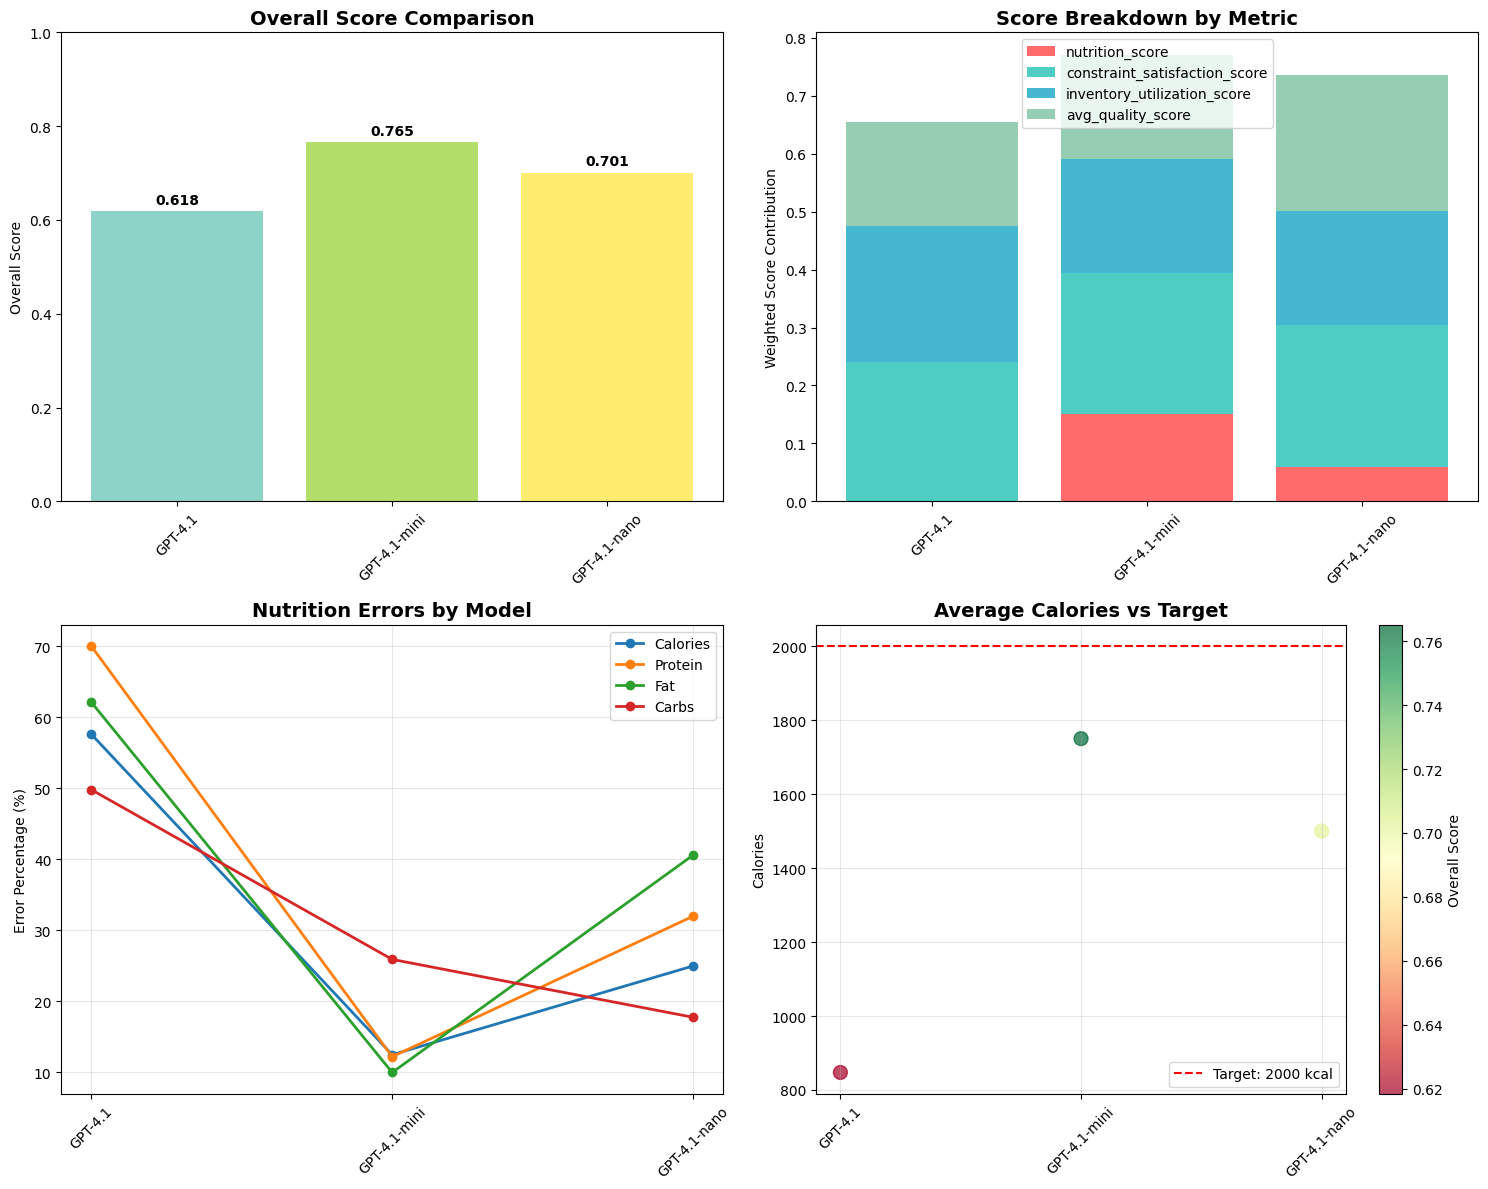

📊 Multi-model comparison visualizations complete


In [14]:
# Multi-model comparison visualization
if len(comparison_results) > 1:
    import matplotlib.pyplot as plt
    import numpy as np

    # Create comparison charts
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    models = df_comparison["model"].tolist()

    # 1. Overall Score Comparison (Bar Chart)
    cmap = plt.get_cmap("Set3")
    colors = cmap(np.linspace(0, 1, len(models)))
    bars = ax1.bar(models, df_comparison["overall_score"], color=colors)
    ax1.set_title("Overall Score Comparison", fontsize=14, fontweight="bold")
    ax1.set_ylabel("Overall Score")
    ax1.set_ylim(0, 1.0)
    ax1.tick_params(axis="x", rotation=45)

    # Add value labels on bars
    for bar, score in zip(bars, df_comparison["overall_score"], strict=False):
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.01,
            f"{score:.3f}",
            ha="center",
            va="bottom",
            fontweight="bold",
        )

    # 2. Metric Breakdown (Stacked Bar Chart)
    metrics = [
        "nutrition_score",
        "constraint_satisfaction_score",
        "inventory_utilization_score",
        "avg_quality_score",
    ]
    bottom = np.zeros(len(models))

    metric_colors = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4"]

    for i, metric in enumerate(metrics):
        values = df_comparison[metric].values * 0.25  # Normalize to show contribution
        ax2.bar(models, values, bottom=bottom, label=metric, color=metric_colors[i])
        bottom += values

    ax2.set_title("Score Breakdown by Metric", fontsize=14, fontweight="bold")
    ax2.set_ylabel("Weighted Score Contribution")
    ax2.legend()
    ax2.tick_params(axis="x", rotation=45)

    # 3. Nutrition Errors (Line Chart)
    if all(
        "nutrition_errors" in result
        for result in comparison_results
        if "error" not in result
    ):
        error_metrics = ["calories", "protein", "fat", "carbs"]
        for i, error_type in enumerate(error_metrics):
            errors = [
                result["nutrition_errors"].get(error_type, 0)
                for result in comparison_results
                if "error" not in result
            ]
            ax3.plot(models, errors, marker="o", label=error_type.title(), linewidth=2)

        ax3.set_title("Nutrition Errors by Model", fontsize=14, fontweight="bold")
        ax3.set_ylabel("Error Percentage (%)")
        ax3.legend()
        ax3.tick_params(axis="x", rotation=45)
        ax3.grid(True, alpha=0.3)

    # 4. Calories vs Target (Scatter Plot)
    target_calories = sample_constraints.daily_calories
    avg_calories = df_comparison["avg_calories"]

    scatter = ax4.scatter(
        models,
        avg_calories,
        c=df_comparison["overall_score"],
        cmap="RdYlGn",
        s=100,
        alpha=0.7,
    )
    ax4.axhline(
        y=target_calories,
        color="red",
        linestyle="--",
        label=f"Target: {target_calories} kcal",
    )
    ax4.set_title("Average Calories vs Target", fontsize=14, fontweight="bold")
    ax4.set_ylabel("Calories")
    ax4.legend()
    ax4.tick_params(axis="x", rotation=45)
    ax4.grid(True, alpha=0.3)

    # Add colorbar for overall score
    cbar = plt.colorbar(scatter, ax=ax4)
    cbar.set_label("Overall Score")

    plt.tight_layout()
    plt.show()

    print("📊 Multi-model comparison visualizations complete")

else:
    print("⚠️ Need at least 2 models for comparison visualization")

In [15]:
# Detailed comparison analysis and visualization
if len(comparison_results) > 1:
    # Create comparison DataFrame
    df_comparison = pd.DataFrame(
        [
            {
                "Model": result["model"],
                "Overall": result["overall_score"],
                "Nutrition": result["nutrition_score"],
                "Constraints": result["constraint_satisfaction_score"],
                "Inventory": result["inventory_utilization_score"],
                "Quality": result["avg_quality_score"],
                "Violations": result["violation_count"],
                "Avg Calories": result["avg_calories"],
            }
            for result in comparison_results
            if "error" not in result
        ]
    )

    print("\n" + "=" * 80)
    print("📊 DETAILED MODEL COMPARISON RESULTS")
    print("=" * 80)

    # Display comparison table

    from rich.table import Table

    comparison_table = Table(title="Multi-Model Performance Comparison")
    comparison_table.add_column("Model", style="cyan")
    comparison_table.add_column("Overall", justify="right", style="bold green")
    comparison_table.add_column("Nutrition", justify="right")
    comparison_table.add_column("Constraints", justify="right")
    comparison_table.add_column("Inventory", justify="right")
    comparison_table.add_column("Quality", justify="right")
    comparison_table.add_column("Violations", justify="right", style="red")
    comparison_table.add_column("Avg Calories", justify="right")

    for _, row in df_comparison.iterrows():
        comparison_table.add_row(
            row["Model"],
            f"{row['Overall']:.3f}",
            f"{row['Nutrition']:.3f}",
            f"{row['Constraints']:.3f}",
            f"{row['Inventory']:.3f}",
            f"{row['Quality']:.3f}",
            str(int(row["Violations"])),
            f"{row['Avg Calories']:.0f}",
        )

    console.print(comparison_table)

    # Find best performing model
    best_model = df_comparison.loc[df_comparison["Overall"].idxmax()]
    worst_model = df_comparison.loc[df_comparison["Overall"].idxmin()]

    print(f"\n🏆 BEST PERFORMING MODEL: {best_model['Model']}")
    print(f"   Overall Score: {best_model['Overall']:.3f}")
    print("   Strengths: ", end="")
    strengths = []
    if best_model["Nutrition"] >= 0.8:
        strengths.append("Nutrition")
    if best_model["Constraints"] >= 0.8:
        strengths.append("Constraints")
    if best_model["Inventory"] >= 0.8:
        strengths.append("Inventory")
    if best_model["Quality"] >= 0.8:
        strengths.append("Quality")
    print(", ".join(strengths) if strengths else "No major strengths")

    print(f"\n📉 NEEDS IMPROVEMENT: {worst_model['Model']}")
    print(f"   Overall Score: {worst_model['Overall']:.3f}")
    print("   Areas for improvement: ", end="")
    weaknesses = []
    if worst_model["Nutrition"] < 0.6:
        weaknesses.append("Nutrition")
    if worst_model["Constraints"] < 0.6:
        weaknesses.append("Constraints")
    if worst_model["Inventory"] < 0.6:
        weaknesses.append("Inventory")
    if worst_model["Quality"] < 0.6:
        weaknesses.append("Quality")
    print(", ".join(weaknesses) if weaknesses else "Minor improvements needed")

    # Performance analysis
    score_range = df_comparison["Overall"].max() - df_comparison["Overall"].min()
    print("\n📈 PERFORMANCE ANALYSIS:")
    print(f"   Score Range: {score_range:.3f}")
    print(f"   Average Score: {df_comparison['Overall'].mean():.3f}")
    print(f"   Standard Deviation: {df_comparison['Overall'].std():.3f}")

    if score_range < 0.1:
        print("   📊 Models show similar performance - differences are minimal")
    elif score_range < 0.3:
        print("   📊 Models show moderate performance differences")
    else:
        print("   📊 Models show significant performance differences")

    # Correlation analysis
    print("\n🔍 KEY INSIGHTS:")
    nutrition_avg = df_comparison["Nutrition"].mean()
    constraint_avg = df_comparison["Constraints"].mean()
    inventory_avg = df_comparison["Inventory"].mean()
    quality_avg = df_comparison["Quality"].mean()

    if nutrition_avg < 0.5:
        print(
            "   ⚠️ All models struggle with nutrition accuracy - consider improving nutrition tools"
        )
    if constraint_avg > 0.9:
        print("   ✅ All models excel at constraint satisfaction")
    if inventory_avg > 0.8:
        print("   ✅ All models efficiently utilize available inventory")
    if quality_avg > 0.7:
        print("   ✅ All models produce high-quality, feasible meal plans")

else:
    print("\n⚠️ Need at least 2 models for comparison analysis")


📊 DETAILED MODEL COMPARISON RESULTS


                                  Multi-Model Performance Comparison                                  
┏━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Model        ┃ Overall ┃ Nutrition ┃ Constraints ┃ Inventory ┃ Quality ┃ Violations ┃ Avg Calories ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ GPT-4.1      │   0.618 │     0.000 │       0.962 │     0.940 │   0.715 │          4 │          847 │
│ GPT-4.1-mini │   0.765 │     0.602 │       0.973 │     0.790 │   0.719 │          4 │         1750 │
│ GPT-4.1-nano │   0.701 │     0.235 │       0.980 │     0.790 │   0.940 │          4 │         1500 │
└──────────────┴─────────┴───────────┴─────────────┴───────────┴─────────┴────────────┴──────────────┘


🏆 BEST PERFORMING MODEL: GPT-4.1-mini
   Overall Score: 0.765
   Strengths: Constraints

📉 NEEDS IMPROVEMENT: GPT-4.1
   Overall Score: 0.618
   Areas for improvement: Nutrition

📈 PERFORMANCE ANALYSIS:
   Score Range: 0.147
   Average Score: 0.695
   Standard Deviation: 0.074
   📊 Models show moderate performance differences

🔍 KEY INSIGHTS:
   ⚠️ All models struggle with nutrition accuracy - consider improving nutrition tools
   ✅ All models excel at constraint satisfaction
   ✅ All models efficiently utilize available inventory
   ✅ All models produce high-quality, feasible meal plans


## Summary

This comprehensive evaluation system provides the following benefits:

1. **No Ground Truth Required**: Evaluation is possible without recipe correctness data, based on practical utility
2. **Multi-dimensional Assessment**: Comprehensive evaluation covering nutrition, practicality, diversity, and constraint compliance
3. **Improvement Guidance**: Specific improvement suggestions provide clear development direction
4. **Visualization**: Radar charts enable intuitive performance understanding
5. **Extensibility**: Easy addition of new evaluation metrics

By utilizing these evaluation metrics, it becomes possible to develop more practical and high-quality nutrition agents.